In [1]:

# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#Load data
df = pd.read_csv(r'C:\Users\dinhn\Downloads\Ethereum_Historical_Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change
0,3/1/2019,135.72,135.47,138.06,128.46,9.73,0.00
1,3/2/2019,132.76,135.72,136.36,130.74,11.29,-0.02
2,3/3/2019,131.01,132.77,168.42,129.05,10.64,-0.01
3,3/4/2019,125.97,131.02,131.57,123.25,14.11,-0.04
4,3/5/2019,136.82,125.97,141.11,125.44,16.74,0.09
...,...,...,...,...,...,...,...
1915,5/28/2024,3845.56,,3929.21,3775.08,436.24,-0.01
1916,5/29/2024,3769.57,3845.56,3886.44,3745.72,353.25,-0.02
1917,5/30/2024,3747.55,3767.22,3824.94,3703.74,293.81,-0.01
1918,5/31/2024,3762.66,3747.89,3844.96,3724.57,294.56,0.00


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

In [5]:
# Split the data into training, validation and test dataset in a ratio of 6:4
train_size = int(0.6 * len(data_scaled))
test_size = int(0.4 * len(data_scaled))


train_data = data_scaled[: train_size]
test_data = data_scaled[train_size:]
     

In [6]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [7]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: -0.18763646024241415
Coefficients: [0.00077632]
R-squared: 0.750594145387343


In [9]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred =  model.predict(x_test)

In [10]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mse = mean_squared_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSE on Test dataset: ", test_mse)

MAPE on Test dataset:  1.6156317453116973
RMSE on Test dataset:  2926.2058997740864
MSE on Test dataset:  8562680.96787267


In [11]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

In [12]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted XRP prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted XRP prices for the next 30 days:
[6232.18855628 6235.83765523 6239.48675418 6243.13585313 6246.78495208
 6250.43405103 6254.08314998 6257.73224894 6261.38134789 6265.03044684
 6268.67954579 6272.32864474 6275.97774369 6279.62684264 6283.27594159
 6286.92504054 6290.57413949 6294.22323844 6297.87233739 6301.52143634
 6305.17053529 6308.81963424 6312.46873319 6316.11783214 6319.76693109
 6323.41603004 6327.06512899 6330.71422794 6334.3633269  6338.01242585]


In [13]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

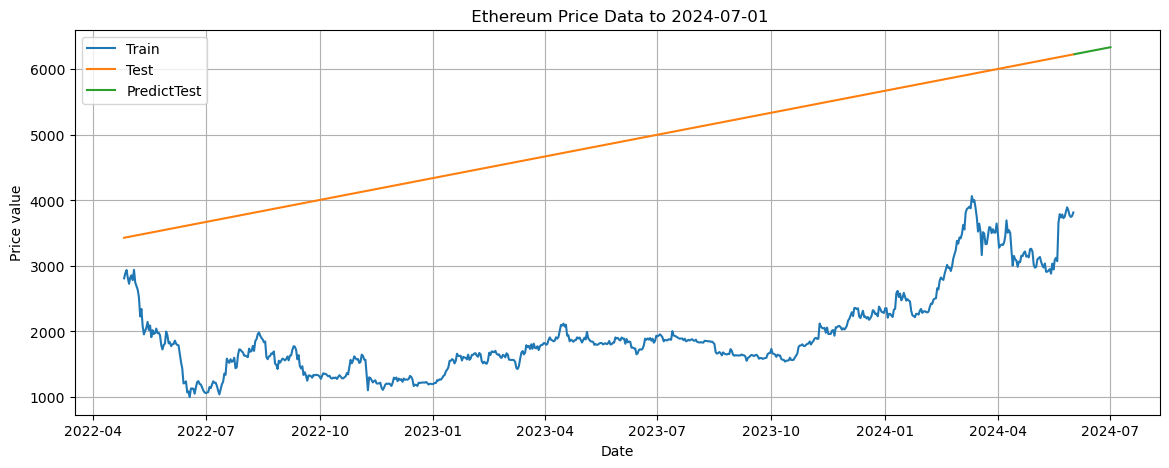

In [14]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f" Ethereum Price Data to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()
     

<h2> Predict for 60 days </h2>

In [15]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

In [16]:
# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted XRP prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted XRP prices for the next 60 days:
[6232.18855628 6235.83765523 6239.48675418 6243.13585313 6246.78495208
 6250.43405103 6254.08314998 6257.73224894 6261.38134789 6265.03044684
 6268.67954579 6272.32864474 6275.97774369 6279.62684264 6283.27594159
 6286.92504054 6290.57413949 6294.22323844 6297.87233739 6301.52143634
 6305.17053529 6308.81963424 6312.46873319 6316.11783214 6319.76693109
 6323.41603004 6327.06512899 6330.71422794 6334.3633269  6338.01242585
 6341.6615248  6345.31062375 6348.9597227  6352.60882165 6356.2579206
 6359.90701955 6363.5561185  6367.20521745 6370.8543164  6374.50341535
 6378.1525143  6381.80161325 6385.4507122  6389.09981115 6392.7489101
 6396.39800905 6400.047108   6403.69620695 6407.3453059  6410.99440486
 6414.64350381 6418.29260276 6421.94170171 6425.59080066 6429.23989961
 6432.88899856 6436.53809751 6440.18719646 6443.83629541 6447.48539436]


In [17]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

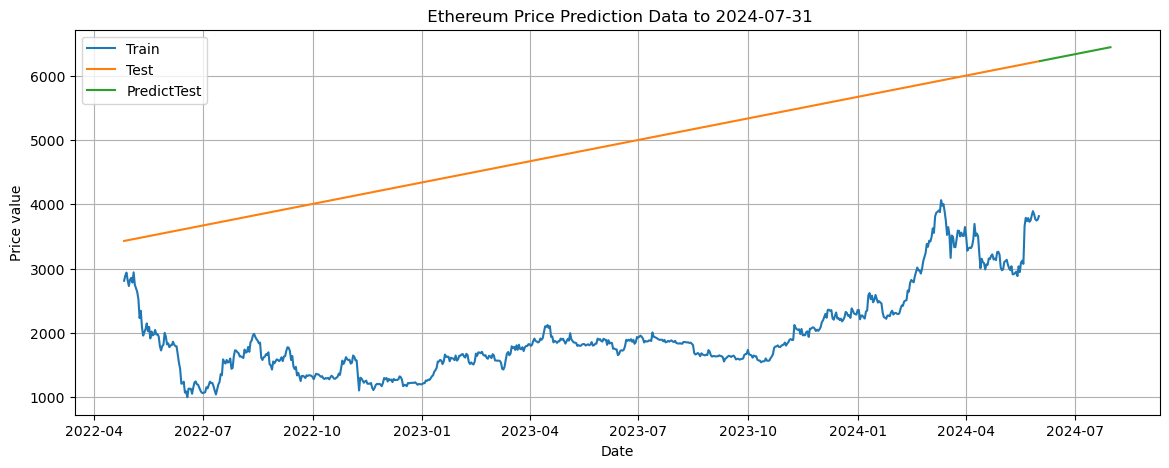

In [18]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f" Ethereum Price Prediction Data to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()

<h2> Predict 90 days
    </h2>

In [19]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [20]:
# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Ethereum prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted Ethereum prices for the next 90 days:
[6232.18855628 6235.83765523 6239.48675418 6243.13585313 6246.78495208
 6250.43405103 6254.08314998 6257.73224894 6261.38134789 6265.03044684
 6268.67954579 6272.32864474 6275.97774369 6279.62684264 6283.27594159
 6286.92504054 6290.57413949 6294.22323844 6297.87233739 6301.52143634
 6305.17053529 6308.81963424 6312.46873319 6316.11783214 6319.76693109
 6323.41603004 6327.06512899 6330.71422794 6334.3633269  6338.01242585
 6341.6615248  6345.31062375 6348.9597227  6352.60882165 6356.2579206
 6359.90701955 6363.5561185  6367.20521745 6370.8543164  6374.50341535
 6378.1525143  6381.80161325 6385.4507122  6389.09981115 6392.7489101
 6396.39800905 6400.047108   6403.69620695 6407.3453059  6410.99440486
 6414.64350381 6418.29260276 6421.94170171 6425.59080066 6429.23989961
 6432.88899856 6436.53809751 6440.18719646 6443.83629541 6447.48539436
 6451.13449331 6454.78359226 6458.43269121 6462.08179016 6465.73088911
 6469.37998806 6473.02908701 64

In [21]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

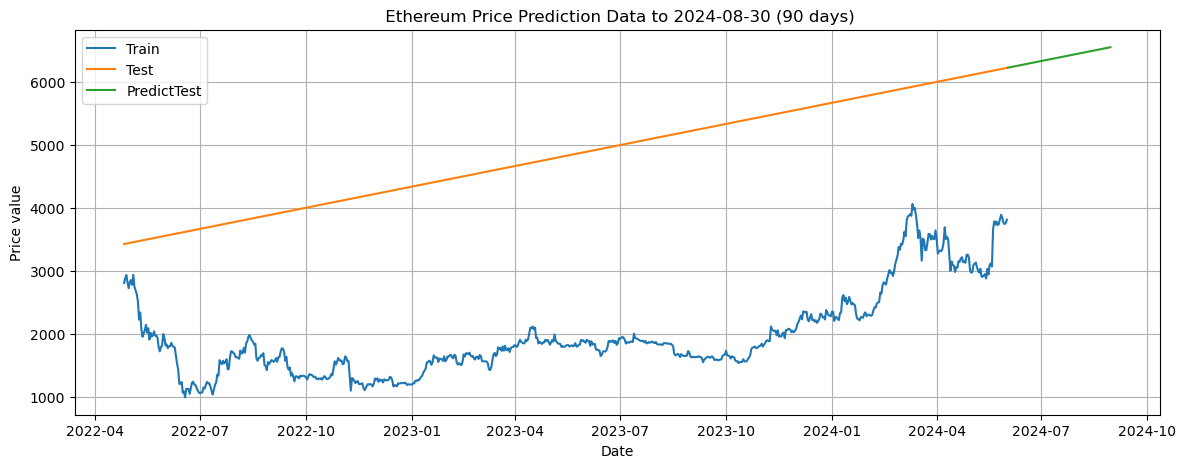

In [22]:
# Drawing
plt.figure(figsize=(14, 5))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f" Ethereum Price Prediction Data to {index_next_90_days[-1].strftime('%Y-%m-%d')} (90 days)")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()